<a href="https://colab.research.google.com/github/pranaviii04/Machine-Learning-Labs/blob/main/Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kth Nearest neighbour

In [43]:
pip install gdown

### Downloading the dataset

In [44]:
!gdown --id 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2 --output groceries.csv

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/groceries.csv
100% 14.6k/14.6k [00:00<00:00, 40.1MB/s]


## Imports


In [54]:
import pandas as pd
from sklearn.preprocessing import  StandardScaler
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Load the data

In [46]:
file_path = "groceries.csv"
data = pd.read_csv(file_path)

print(data.head())
print(data.info())


   Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  class
0       3  12669  9656     7561     214              2674        1338      2
1       3   7057  9810     9568    1762              3293        1776      2
2       3   6353  8808     7684    2405              3516        7844      2
3       3  13265  1196     4221    6404               507        1788      1
4       3  22615  5410     7198    3915              1777        5185      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Region            440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
 7   class             440 no

## Preprocessing the data

In [47]:

# Check for missing values
print(data.isnull().sum())

# Features and target
X = data.drop("class", axis=1)
y = data["class"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape of X:", X_scaled.shape)
print("Shape of y:", y.shape)



Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
class               0
dtype: int64
Shape of X: (440, 7)
Shape of y: (440,)


## Visualize data

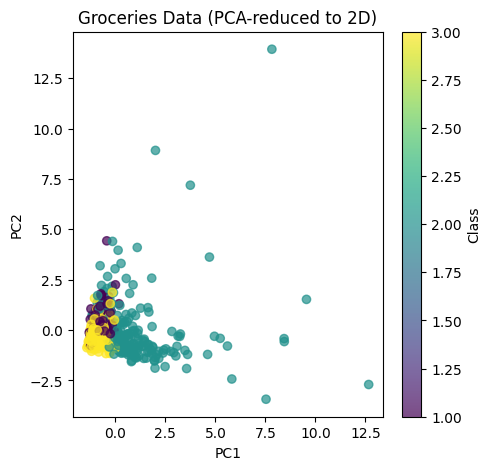

In [48]:
# Reduce to 2D with PCA for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Plot points with color = class
plt.figure(figsize=(5,5))
scatter = plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y, cmap="viridis", alpha=0.7)
plt.title("Groceries Data (PCA-reduced to 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="Class")
plt.show()

## Scratch implementation of KNN

In [49]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(query_point, X_train, y_train, k=5):
    """
    query_point : 1D numpy array (the point we want to classify)
    X_train     : numpy array of training features
    y_train     : array/series of training labels
    k           : number of neighbors to consider
    """

    # 1. Compute distances from query_point to each point in training set
    distances = [euclidean_distance(query_point, x_train) for x_train in X_train]

    # 2. Sort distances and get indices of k nearest neighbors
    k_indices = np.argsort(distances)[:k]

    # 3. Get labels of k nearest neighbors
    k_nearest_labels = [y_train[i] for i in k_indices]

    # 4. Majority vote
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0], k_indices

In [51]:
# Pick a query point from test set
query_index = 0
query_point = X_test[query_index]

# Run KNN
pred_class, neighbors_idx = knn_predict(query_point, X_train, y_train.values, k=5)

print("Query Point True Class:", y_test.iloc[query_index])
print("Predicted Class:", pred_class)
print("Indices of Nearest Neighbors:", neighbors_idx)

Query Point True Class: 3
Predicted Class: 3
Indices of Nearest Neighbors: [335  40  95 143 211]


## KNN using Scikit-learn


In [56]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # k=5

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN (sklearn) Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


KNN (sklearn) Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.75      0.75        16
           2       0.91      0.82      0.86        39
           3       0.86      0.97      0.91        33

    accuracy                           0.86        88
   macro avg       0.84      0.85      0.84        88
weighted avg       0.87      0.86      0.86        88



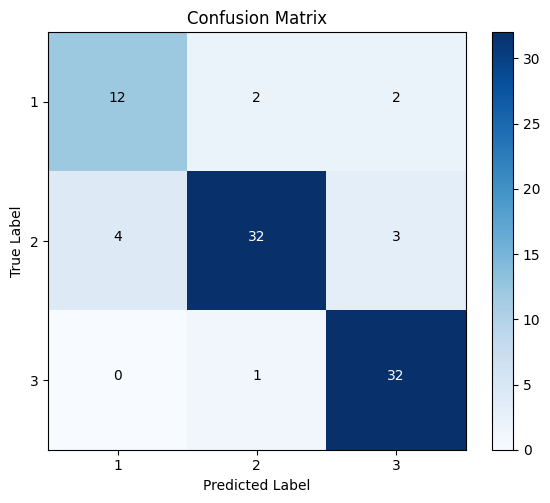

In [55]:
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)

plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Tick marks
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Labels inside each square
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max()/2 else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()